数据集的长度： 259


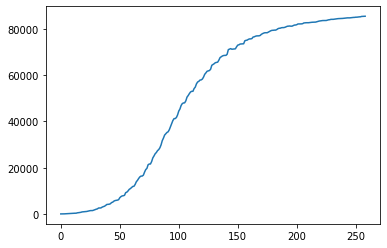

原始训练集的长度： 207
原始测试集的长度： 52
转为监督学习，训练集数据长度： 199
转为监督学习，测试集数据长度： 44
构造得到模型的输入数据(训练数据已有标签trainY):  (199, 7, 1, 1, 1) (44, 7, 1, 1, 1)
Epoch 1/100
7/7 [==============================] - 2s 7ms/step - loss: 0.3411
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2762
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2157
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1498
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0845
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0269
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 7.8791e-04
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 8.2961e-04
E

7/7 [==============================] - 0s 7ms/step - loss: 3.0104e-05
Epoch 99/100
7/7 [==============================] - 0s 7ms/step - loss: 2.6308e-05
Epoch 100/100
7/7 [==============================] - 0s 7ms/step - loss: 2.5070e-05
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_16 (ConvLSTM2D)  (None, 1, 1, 64)         16896     
                                                                 
 flatten_15 (Flatten)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 2ms/step
Test Score:  0.0033077769

In [25]:
#单变量，1---》1 

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import ConvLSTM2D
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#matplotlib inline

# load the dataset
dataframe = read_csv('D://毕业设计//Data//Forecasting//Global_1day.csv', usecols=[1], engine='python')
# print(dataframe)
print("数据集的长度：",len(dataframe))
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


# X是给定时间(t)的乘客人数，Y是下一次(t + 1)的乘客人数。
# 将值数组转换为数据集矩阵,look_back是步长。
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        # X按照顺序取值
        dataX.append(a)
        # Y向后移动一位取值
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)


# 数据缩放
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# 将数据拆分成训练和测试，2/3作为训练数据
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("原始训练集的长度：",train_size)
print("原始测试集的长度：",test_size)



# 构建监督学习型数据
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back) 
print("转为监督学习，训练集数据长度：", len(trainX))
# print(trainX,trainY)
print("转为监督学习，测试集数据长度：",len(testX))
# print(testX, testY )
# 数据重构为5D [samples, timesteps, rows, columns, features]
# trainX = numpy.reshape(trainX, (trainX.shape[0], 1,1, trainX.shape[1]))
# testX = numpy.reshape(testX, (testX.shape[0], 1,1, testX.shape[1]))

# 数据重构为5D [samples, timesteps, rows, columns, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 7,1,1, 1))
testX = numpy.reshape(testX, (testX.shape[0],7, 1,1, 1))
print('构造得到模型的输入数据(训练数据已有标签trainY): ',trainX.shape,testX.shape)

# create and fit the LSTM network
model = Sequential()
# model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1,1,1,testX.shape[1])))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(7, 1,1, 1)))

model.add(Flatten())
model.add(Dense(1))





model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=100)

# 打印模型
model.summary()

# 开始预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: ' , testScore)
from sklearn import metrics
print('Test MAE:',metrics.mean_absolute_error(testY, testPredict[:, 0]))

# 逆缩放预测值
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 计算误差
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
from sklearn import metrics
print('Test MAE:',metrics.mean_absolute_error(testY[0], testPredict[:, 0]))
 
# from sklearn.metrics import mean_squared_error
# print('RMSE:',math.sqrt(mean_squared_error(testY[0], testPredict[:, 0])))




In [27]:
import pandas as pd
print(testPredict[:, 0])
data = pd.DataFrame(testPredict)
writer = pd.ExcelWriter('D://毕业设计//Data//Forecasting//result//DEU.xlsx')		# 写入Excel文件
data.to_excel(writer, 'page_1', float_format='%.5f')		# ‘page_1’是写入excel的sheet名
writer.save()
writer.close()

[83180.01  83218.055 83256.43  83292.52  83352.55  83425.72  83513.38
 83604.414 83698.695 83794.414 83881.414 83946.99  83997.945 84059.1
 84131.21  84199.7   84281.44  84356.14  84425.695 84501.56  84561.945
 84628.15  84694.05  84743.95  84792.27  84835.58  84879.61  84929.01
 84976.61  85028.01  85074.42  85115.13  85152.44  85194.36  85240.95
 85281.43  85314.72  85360.08  85401.695 85455.19  85506.42  85550.48
 85618.39  85683.46 ]


<ipython-input-27-852167b01257>:4: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  writer = pd.ExcelWriter('D://毕业设计//Data//Forecasting//result//DEU.xlsx')		# 写入Excel文件
<ipython-input-27-852167b01257>:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
fig, ax = plt.subplots(figsize=(10,5),dpi = 300)
plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
ax.plot( trainPredictPlot, linewidth=2.0,label = "trainpredict")
ax.plot( testPredictPlot, linewidth=2.0,label = "testpredict")
ax.legend(loc=2);
plt.xlabel('Day')
plt.ylabel('Case')
# plt.ylim((0, 10))
plt.grid(linestyle='-.')
plt.title('DEU Case-CovLSTM')
plt.savefig("D://毕业设计//result//预测//CovLSTM//DEU Case.png",bbox_inches = 'tight')
plt.show()